# NET 2020

## 8. Async

### 8.2. Exercise

Implement missing classes:

1. Tests should pass with 100% coverage. 
2. Command line application should work.
3. There should be no inspection issues

Remember first to commit the unchanged code and then the solution in a separate commit!

To start editing code, run:

In [ ]:
! rider project/project.sln

UML:

In [1]:
import iplantuml;

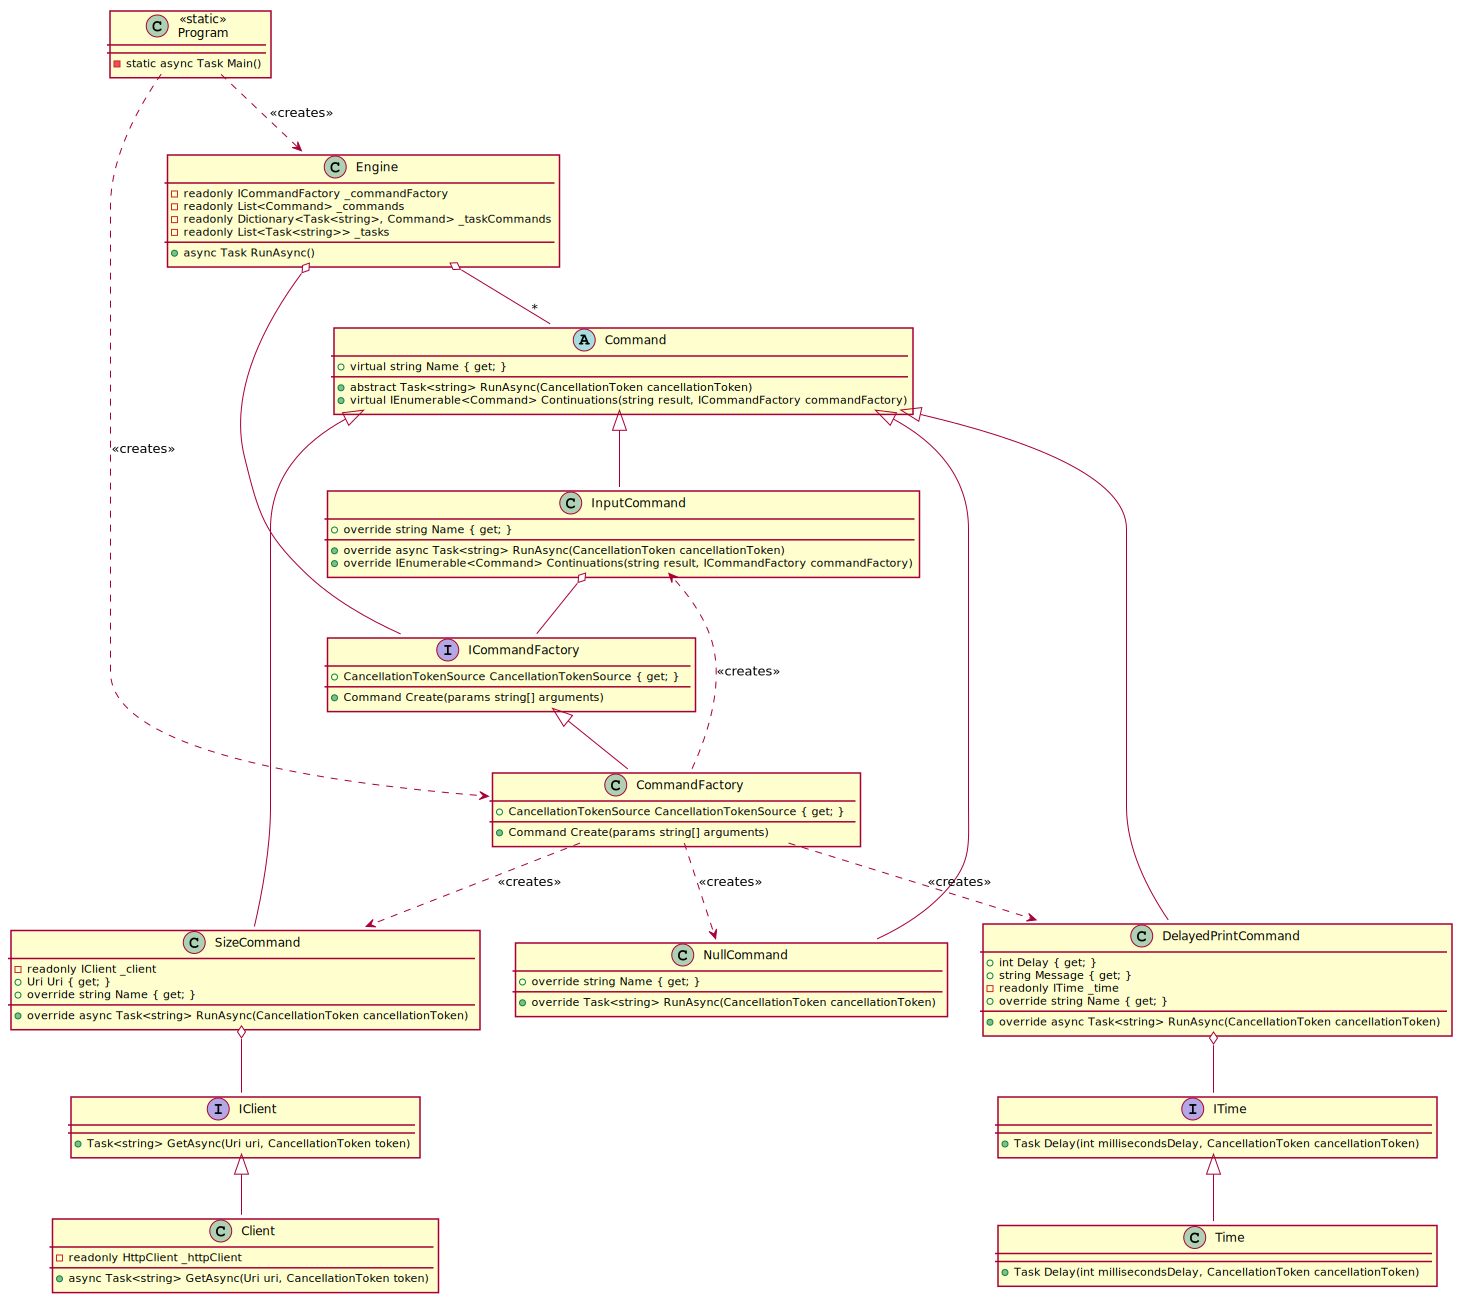

In [2]:
%%plantuml

@startuml

interface IClient {
    + Task<string> GetAsync(Uri uri, CancellationToken token)
}

class Client {
    - readonly HttpClient _httpClient
    + async Task<string> GetAsync(Uri uri, CancellationToken token)
}

IClient <|-- Client

interface ITime {
    + Task Delay(int millisecondsDelay, CancellationToken cancellationToken)
}

class Time {
    + Task Delay(int millisecondsDelay, CancellationToken cancellationToken)
}

ITime <|-- Time

abstract class Command {
    + virtual string Name { get; }
    + abstract Task<string> RunAsync(CancellationToken cancellationToken)
    + virtual IEnumerable<Command> Continuations(string result, ICommandFactory commandFactory)
}

class NullCommand {
    + override string Name { get; }
    + override Task<string> RunAsync(CancellationToken cancellationToken)
}
Command <|-- NullCommand

class DelayedPrintCommand {
    + int Delay { get; }
    + string Message { get; }
    - readonly ITime _time
    + override string Name { get; }
    + override async Task<string> RunAsync(CancellationToken cancellationToken)
}
Command <|-- DelayedPrintCommand

class SizeCommand {
    - readonly IClient _client
    + Uri Uri { get; }
    + override string Name { get; }
    + override async Task<string> RunAsync(CancellationToken cancellationToken)
}
Command <|-- SizeCommand

class InputCommand {
    + override string Name { get; }
    + override async Task<string> RunAsync(CancellationToken cancellationToken)
    + override IEnumerable<Command> Continuations(string result, ICommandFactory commandFactory)
}
Command <|-- InputCommand

interface ICommandFactory {
    + CancellationTokenSource CancellationTokenSource { get; }
    + Command Create(params string[] arguments)
}

class CommandFactory {
    + CancellationTokenSource CancellationTokenSource { get; }
    + Command Create(params string[] arguments)
}
ICommandFactory <|-- CommandFactory

class Engine {
    - readonly ICommandFactory _commandFactory
    - readonly List<Command> _commands
    - readonly Dictionary<Task<string>, Command> _taskCommands
    - readonly List<Task<string>> _tasks
    + async Task RunAsync()
}

class Program <<static>> {
    - static async Task Main()
}

DelayedPrintCommand o-- ITime
SizeCommand o-- IClient
InputCommand o-- ICommandFactory
Engine o-- "*" Command
Engine o-- ICommandFactory

CommandFactory ..> NullCommand : <<creates>>
CommandFactory ..> InputCommand : <<creates>>
CommandFactory ..> DelayedPrintCommand : <<creates>>
CommandFactory ..> SizeCommand : <<creates>>
Program ..> CommandFactory : <<creates>>
Program ..> Engine : <<creates>>

@enduml